In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
resize = 1
plt.rcParams.update({
    "figure.figsize": (6.4*resize, 4.0*resize), # (6.4, 4.8)[4:3] -> (6.4, 4.0)[8:5]
    "font.sans-serif": ["Helvetica", "Nimbus Sans", "Arial", "DejaVu Sans"],
    #"legend.fontsize": 9,
})

In [3]:
#additional_time_ratio = 1.05
#str_t = ("%.2f" % additional_time_ratio).replace(".", "")
dir_path = '../ver_arxiv/npy_result'
common_name = 'cifar100_resnet18_e140'

def load_npy(filename: str):
    return np.load(filename, allow_pickle=True).item()

def print_results(key, npy):
    best = np.argmax(npy['val_acc'])
    print(
        f'{key},',
        f'time: {npy["commit_time"][-1]: .1f},',
        f'loss: {npy["val_loss"][-1]: .3f},',
        f'acc: {round(npy["val_acc"][-1] * 100, 1)}%,',
        f'index: {best},',
        f'best_loss: {npy["val_loss"][best]: .3f},',
        f'best_acc: {round(npy["val_acc"][best] * 100, 1)}%'
    )

In [4]:
npy = {
    'conf': {
        #'single': load_npy(f'{dir_path}/conf_{common_name}_t105_w2s0.npy'),
        's0': load_npy(f'{dir_path}/conf_{common_name}_t105_w5s0.npy'),
        't105': {
            's1': load_npy(f'{dir_path}/conf_{common_name}_t105_w5s1.npy'),
            's2': load_npy(f'{dir_path}/conf_{common_name}_t105_w5s2.npy'),
            's3': load_npy(f'{dir_path}/conf_{common_name}_t105_w5s3.npy'),
            's4': load_npy(f'{dir_path}/conf_{common_name}_t105_w5s4.npy'),
        },
        't110': {
            's1': load_npy(f'{dir_path}/conf_{common_name}_t110_w5s1.npy'),
            's2': load_npy(f'{dir_path}/conf_{common_name}_t110_w5s2.npy'),
            's3': load_npy(f'{dir_path}/conf_{common_name}_t110_w5s3.npy'),
            's4': load_npy(f'{dir_path}/conf_{common_name}_t110_w5s4.npy'),
        },
    },
    'journal': {
        #'single': load_npy(f'{dir_path}/{common_name}_t105_w2s0.npy'),
        's0': load_npy(f'{dir_path}/{common_name}_t105_w5s0.npy'),
        't105': {
            's1': load_npy(f'{dir_path}/{common_name}_t105_w5s1.npy'),
            's2': load_npy(f'{dir_path}/{common_name}_t105_w5s2.npy'),
            's3': load_npy(f'{dir_path}/{common_name}_t105_w5s3.npy'),
            's4': load_npy(f'{dir_path}/{common_name}_t105_w5s4.npy'),
        },
        't110': {
            's1': load_npy(f'{dir_path}/{common_name}_t110_w5s1.npy'),
            's2': load_npy(f'{dir_path}/{common_name}_t110_w5s2.npy'),
            's3': load_npy(f'{dir_path}/{common_name}_t110_w5s3.npy'),
            's4': load_npy(f'{dir_path}/{common_name}_t110_w5s4.npy'),
        },
    },
}

In [5]:
print(npy['journal']['t105']['s1'].keys())

dict_keys(['worker_ID', 'global_commit_ID', 'local_commit_ID', 'step_ID', 'stage_ID', 'train_loss', 'train_acc', 'train_time', 'val_loss', 'val_acc', 'commit_time'])


### Result

In [6]:
for key1, value1 in npy.items():
    print(key1)
    #print_results('single', value1['single'])
    print_results('s0', value1['s0'])
    print('- t105')
    for key2, value2 in value1['t105'].items():
        print_results(key2, value2)
    print('- t110')
    for key2, value2 in value1['t110'].items():
        print_results(key2, value2)
    print('====')

conf
s0, time:  1540.6, loss:  1.953, acc: 67.8%, index: 479, best_loss:  1.948, best_acc: 68.0%
- t105
s1, time:  1598.1, loss:  1.754, acc: 69.0%, index: 467, best_loss:  1.755, best_acc: 69.1%
s2, time:  1547.1, loss:  1.787, acc: 69.9%, index: 548, best_loss:  1.787, best_acc: 70.0%
s3, time:  1569.9, loss:  1.869, acc: 69.7%, index: 412, best_loss:  1.854, best_acc: 70.0%
s4, time:  1565.3, loss:  1.886, acc: 69.3%, index: 420, best_loss:  1.875, best_acc: 69.8%
- t110
s1, time:  1646.9, loss:  1.779, acc: 68.6%, index: 471, best_loss:  1.776, best_acc: 68.8%
s2, time:  1679.3, loss:  1.761, acc: 70.6%, index: 521, best_loss:  1.761, best_acc: 70.8%
s3, time:  1719.8, loss:  1.811, acc: 70.8%, index: 424, best_loss:  1.797, best_acc: 71.1%
s4, time:  1682.3, loss:  1.901, acc: 69.8%, index: 508, best_loss:  1.897, best_acc: 70.1%
====
journal
s0, time:  1384.7, loss:  1.919, acc: 67.4%, index: 470, best_loss:  1.893, best_acc: 68.0%
- t105
s1, time:  1480.8, loss:  1.811, acc: 69.

### Plot

In [7]:
SAVE = True
#DPI = 300 if SAVE else 72 # [72, 150, 240, 300]
fig_data = 'cifar100'
fig_path = './figure'

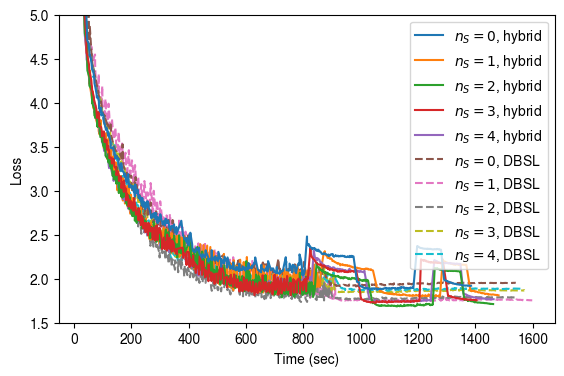

In [8]:
tag = 't105'
feature = 'val_loss'
fig_name = f'{fig_data}_{tag}_{feature}'

plt.figure()#(dpi=DPI)

plt.plot(npy['journal']['s0']['commit_time'], npy['journal']['s0'][feature],
         label='$n_S=0$, hybrid', zorder=-npy['journal']['s0']['commit_time'][-1])
for key, value in npy['journal'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             label=f'$n_S={key[1]}$, hybrid', zorder=-value['commit_time'][-1])

plt.plot(npy['conf']['s0']['commit_time'], npy['conf']['s0'][feature],
         '--', label='$n_S=0$, DBSL', zorder=-npy['conf']['s0']['commit_time'][-1])
for key, value in npy['conf'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             '--', label=f'$n_S={key[1]}$, DBSL', zorder=-value['commit_time'][-1])

plt.ylim(bottom=1.5, top=5)
plt.xlabel('Time (sec)')
plt.ylabel('Loss')
plt.legend()
None if SAVE else plt.title(fig_name)
plt.savefig(f'{fig_path}/{fig_name}.pdf', bbox_inches="tight") if SAVE else plt.show()

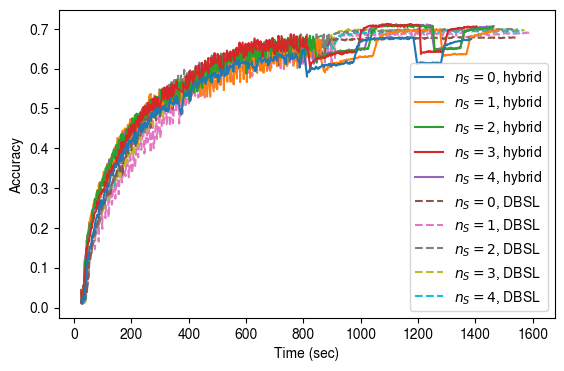

In [9]:
tag = 't105'
feature = 'val_acc'
fig_name = f'{fig_data}_{tag}_{feature}'

plt.figure()#(dpi=DPI)

plt.plot(npy['journal']['s0']['commit_time'], npy['journal']['s0'][feature],
         label='$n_S=0$, hybrid', zorder=-npy['journal']['s0']['commit_time'][-1])
for key, value in npy['journal'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             label=f'$n_S={key[1]}$, hybrid', zorder=-value['commit_time'][-1])

plt.plot(npy['conf']['s0']['commit_time'], npy['conf']['s0'][feature],
         '--', label='$n_S=0$, DBSL', zorder=-npy['conf']['s0']['commit_time'][-1])
for key, value in npy['conf'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             '--', label=f'$n_S={key[1]}$, DBSL', zorder=-value['commit_time'][-1])

plt.xlabel('Time (sec)')
plt.ylabel('Accuracy')
plt.legend()
None if SAVE else plt.title(fig_name)
plt.savefig(f'{fig_path}/{fig_name}.pdf', bbox_inches="tight") if SAVE else plt.show()

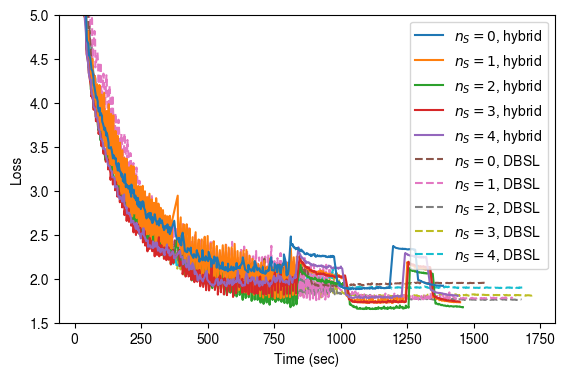

In [10]:
tag = 't110'
feature = 'val_loss'
fig_name = f'{fig_data}_{tag}_{feature}'

plt.figure()#(dpi=DPI)

plt.plot(npy['journal']['s0']['commit_time'], npy['journal']['s0'][feature],
         label='$n_S=0$, hybrid', zorder=-npy['journal']['s0']['commit_time'][-1])
for key, value in npy['journal'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             label=f'$n_S={key[1]}$, hybrid', zorder=-value['commit_time'][-1])

plt.plot(npy['conf']['s0']['commit_time'], npy['conf']['s0'][feature],
         '--', label='$n_S=0$, DBSL', zorder=-npy['conf']['s0']['commit_time'][-1])
for key, value in npy['conf'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             '--', label=f'$n_S={key[1]}$, DBSL', zorder=-value['commit_time'][-1])

plt.ylim(bottom=1.5, top=5)
plt.xlabel('Time (sec)')
plt.ylabel('Loss')
plt.legend()
None if SAVE else plt.title(fig_name)
#plt.savefig(f'{fig_path}/{fig_name}.png', transparent=True) if SAVE else plt.show()

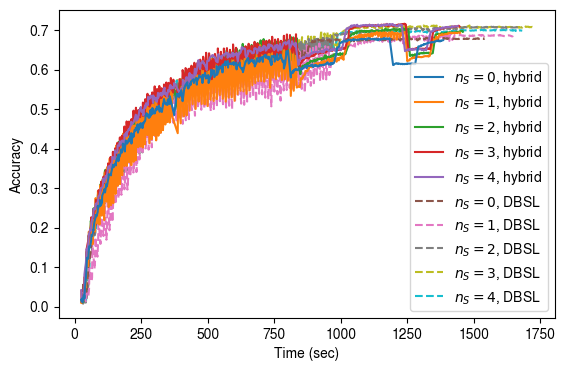

In [11]:
tag = 't110'
feature = 'val_acc'
fig_name = f'{fig_data}_{tag}_{feature}'

plt.figure()#(dpi=DPI)

plt.plot(npy['journal']['s0']['commit_time'], npy['journal']['s0'][feature],
         label='$n_S=0$, hybrid', zorder=-npy['journal']['s0']['commit_time'][-1])
for key, value in npy['journal'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             label=f'$n_S={key[1]}$, hybrid', zorder=-value['commit_time'][-1])

plt.plot(npy['conf']['s0']['commit_time'], npy['conf']['s0'][feature],
         '--', label='$n_S=0$, DBSL', zorder=-npy['conf']['s0']['commit_time'][-1])
for key, value in npy['conf'][tag].items():
    plt.plot(value['commit_time'], value[feature],
             '--', label=f'$n_S={key[1]}$, DBSL', zorder=-value['commit_time'][-1])

plt.xlabel('Time (sec)')
plt.ylabel('Accuracy')
plt.legend()
None if SAVE else plt.title(fig_name)
#plt.savefig(f'{fig_path}/{fig_name}.png', transparent=True) if SAVE else plt.show()